In [1]:
# The line below imports the module pointy_game but
# renames it in this notebook to PointyGame
import pointy_game as PointyGame

# The line below imports all global variables,
# functions, and classes from the strategy module
# We will be using the different game playing strats
# for exercise 04
from strategy import *


# We need to import the creature
from creature import Creature

# Lab 03 and 04: PointyGame

Objectives

* Demonstrate an understanding of modules, classes, and functions
* Get practice reading someone else's code and documentation
* Practice method implementation
* Practice using 2-dimensional arrays
* Practice using the notebook (hint: you'll be restarting the kernel to reload the PointyGame module quite a bit as you progress in implementing the solution to the missing functions in the Creature class.
* Practice testing your code


This lab is spread across a couple lab sessions.  If you do not finish Lab 03, you can use a solution I post before class on Monday to complete Lab 04.

## Lab 03
For Lab 03, I would like you to:
* Complete writing the Creature class in the PointyGame module by filling in the missing methods:
    * move_forward
    * rotate_left
    * rotate_right
    * is_alive
    * kill
* Follow the descriptions in the comments to implement these methods.
* Remove the `raise Exception(...)` code in the unimplemented methods -- I'm making the game crash if they're not implemented.
* Test your solution by putting a creature in a game and manipulating it by calling the appropriate `Creature` movement functions yourself.
* Add a cell at the bottom of this notebook that will play the PointyGame for 20 rounds using
    * The random strategy
    * The greedy strategy

## The Game class in the PointyGame module

This implements a grid-based game where in a creature moves about the board.  It expends "energy" as it moves.  A creature plays the game "successfully" if it ends with a high amount of energy from the consumption of food rewards without losing energy from too much movement or the consumption of poisons.

A creature:

+ Collects either poisons or food rewards from cells it lands on
+ Moves forward in the direction it is facing
+ Rotate left
+ Rotate right
+ Choose to end the game.

Here is an overview of the gameboard

<img src="screenshot.png" width="480" alt="Gameboard">

Movements have the following penalties:
* move_forward: -10
* rotate_left: -5
* rotate_right: -5

If a creature lands (or starts) on a cell with a "reward" or "poison" its score is altered.

Rewards (and poisons) are as follows:
* cherry: 100 points
* turnip: 50 points
* red poison: -100 points
* blue poison: -30 points

Rewards/poisons are randomly placed on the board.

If a creature goes outside the bounds of the board (into the water) it dies.

Game play ends if the creature gets a score below zero or the creature's selects to end the game.


See the cells below for an example of game play.  In short the process is:
1. Create an instance of PointyGame Creature
2. Create an instance of PointyGame Game
3. Call play(play_func) method on an instance of the game to play a single round of the game.
    * If this returns false the game is over.
    * Repeat calling the play method until the game ends.

## The Creature class in PointyGame module

Part of today's exercise is understanding what different components are.

A **class** define the attributes (data and methods) for a particular **type**.  **Instances** are instantiations (created objects) of classes.  They have a **type**.

The `Creature` class contains the data and methods for a creature to navigate the game board defined above.  If you examine the **module** (python .py file) creature.py, you will see the class definition for Creature.  Open the file in your editor (so, VSCode, PyCharm, Jupyter Notebook, etc) nd examine the code.  The comments in the code will explain how different elements in the class work.

A creature has a `score` which indicates how well it is doing in the game.  If the score is ever non-positive (so zero or less) then the creature "dies" and the game will end.

A creature dies in a number of ways: 
* It consumes too much "poison" without collecting food
* It makes too many moves without collecting food
* It falls off the gameboard into the "water" -- killing it instantly
    
The goal is for the creature to forage for food while avoiding cells that contain poison or falling off the edge of the world into the "water".

**For Exercise 03, you will be finishing the Creature class by filling in the missing methods in the PointyGame module.**
    

## Gameplay functions

To play the game, a function is passed to the game's `play` method that tells the game how to make the next move.  You can examine how the game is created and played by examining the contents of the `pointy_game.py` module.  Like `Creature`, it is imported at the top of this notebook.

Below are examples of these functions.

The gameplay functions take positional arguments for the game and the creature.  The game calls one of these methods during each round of play (it is passed to the play method) to determine how the creature moves.  Each function will return a single character string of either "F", "L", "R", or "X" as described in the PointyGame comments.  In short:
* F will move the creature forward one cell in the direction it is facing
* L will rotate the creature left 90 degrees
* R will rotate the creature right 90 degrees
* X will tell the game to end (for example, why play if there are no more rewards?)




## Examples of Game Play

In this example we're creating a world that is 5x5 cells in size and drawing the game board prior to playing.

Here we see multiple examples of using **attributes** to manipulate objects.  **Attributes** in Python are either data members or methods.  You can see when they are used with the dot notation in the game play example below.  For example, consider:

    game.reset()  # Resets the game

`game` is an instance of the Game class (created in the cell below).  `reset` is an attribute of Game: in this case a method that resets the board.

You can see all the attributes of a Game by examining the Game class in the `pointy_game.py` module.

This is the board before any gameplay.


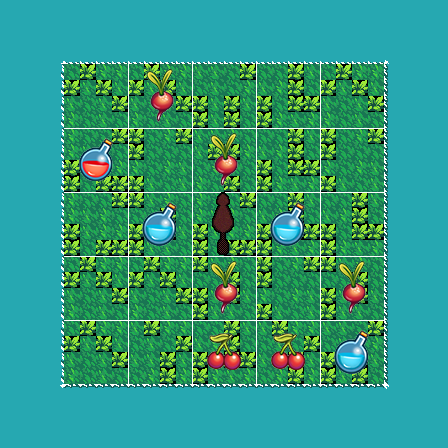

In [2]:
# This is an example of initializing this game and displaying the current gameboard
world_size = (5,5)

# Our creature is going to start at position (2,2) in the world, facing "North"
# Here we are creating a Creature called creature.  Python is case sensitive, so 
# creature refers to an instance of the class Creature.  The syntax below on the
# right is how we call the method `__init__` in the Creature class.  `__init__` 
# initializes the data members of Creature with their starting values.
creature = Creature(500, world_size, (2,2), init_facing='N')

# Since we imported the `pointy_game` as PointyGame, we can use the notation
# below to create and initialize an instance of the class Game.  If you
# examine the `pointy_game` module, you will see multiple classes defined in it.
# Here we want to just initialize a new instance of the class Game, so we use
# the dot notation to say "Within the PointyGame module, I would like to
# initialize a new Game".
game = PointyGame.Game(world_size, creature)

# Display our gameboard
print('This is the board before any gameplay.')


display(game.current_board)

Last Move: None
Current Score:  500


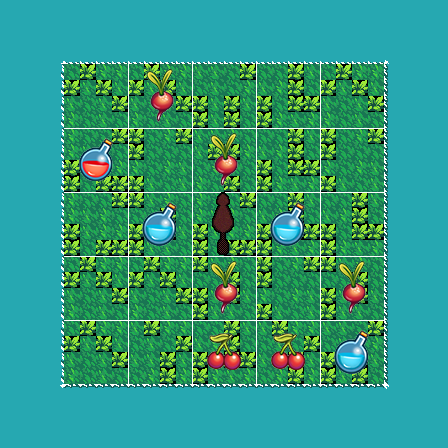

In [3]:
# We can always reset the game to the initial state of it by calling
# reset
game.reset()
print('Last Move:', game.last_move)
print('Current Score: ', creature.score)
display(game.current_board)

In [4]:
# We can see the list of lists that contains
# the points in each cell by looking at the 
# points matrix.
# Which values map to the different fruits / poisons?

# points_matrix is a method of the Game class.  It returns
# an array of arrays.  Each element of the array is a row,
# each element of the row subarray is a column in that row.
game.points_matrix()

[[0, 50, 0, 0, 0],
 [-100, 0, 50, 0, 0],
 [0, -30, 0, -30, 0],
 [0, 0, 50, 0, 50],
 [0, 0, 100, 100, -30]]

In [5]:
# We can see where our creature is by looking at
# Here current_location is a data attribute.  In Python
# all data attributes are visible.  Typically ones that
# should not be used begin with an _ though this is not
# enforced.  
creature.current_location

(2, 2)

In [6]:
# We can see our creature's score by looking at
# Again, score is a data attribute
creature.score

500

## Testing the methods

The cells below will only work once you have the ability to move and rotate the creature implemented.

The idea is for you to test moving and rotating the creature using

+ play_move_forward
+ play_rotate_left
+ play_rotate_right

To see if the creature behaves as intended.  Be sure to try testing what happens when the creature hits a boundary.

You may use this method to test your code.  Ideally, you should also be able to pass the tests in test_creature.py.

**Don't panic**.  This material is what you'd find at the end of an introduction to Python course.  I'm including it early in the semester so you know what it is that you are typing when you are using modules and packages written by others.


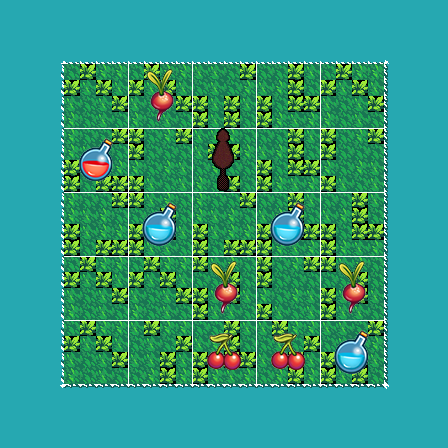

In [7]:
# Let's move our creature forward
# play_move_forward is a function inside of the
# strategy module.  It *always* moves the creature
# forward one cell
game.play(play_move_forward)

# And draw the board again
display(game.current_board)

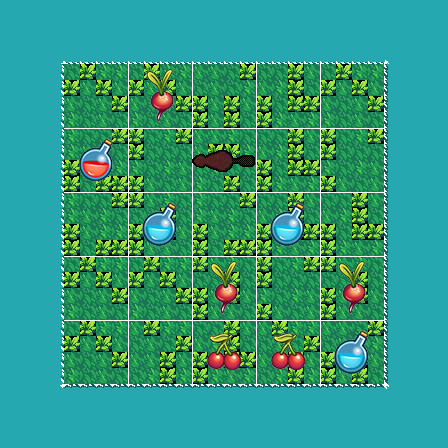

In [8]:
# Let's rotate our creature to the left
# play_rotate_left rotates the creature left
game.play(play_rotate_left)

# And draw the board again
display(game.current_board)

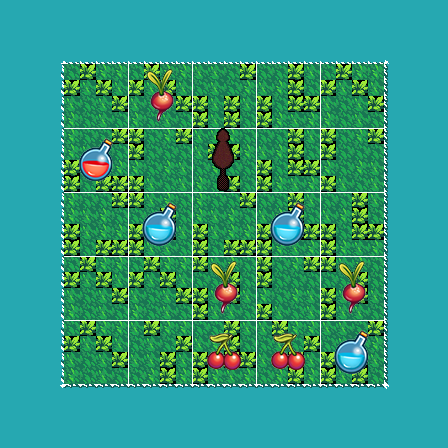

In [9]:
# Let's rotate our creature to the right
# play_rotate_right rotates the creature right
game.play(play_rotate_right)

# And draw the board again
display(game.current_board)